# Prediction of Appointment No-Show using Classification Models

Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively. we will prediction if the person shows up or not using a few classitfication algorithms.

In [460]:
# grid search and hyperparameter
# night and morning
# feature engineer to rise model rate 
# فهرس 
# نسوي بوتستراب وناخذ المتوسط بينهم = (bootstrap)
#واخذ الاقل RF,linear reg,Xgboost ممكن اطلع الايرور ل 
# K-fold
# knn 
# scale 
# recall, accuracy ,, 4
#يحسن القيمة لازم نجربه

In [461]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [462]:
df_appointments = pd.read_csv('Data/appointment.csv')
df_appointments.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [463]:
df_appointments['No-show'] = df_appointments['No-show'].str.replace('No', '1')
df_appointments['No-show'] = df_appointments['No-show'].str.replace('Yes', '0')
df_appointments.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


# BaseLine 

In [464]:
X = df_appointments.drop(['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Neighbourhood','No-show'], axis = 1)
y = df_appointments['No-show']
#y =pd.DataFrame(y)
#y(['Scholarship','Hipertension','Diabetes','Alcoholis','Handcap','SMS_received'],

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42)
X_train, X_val , y_train, y_val = train_test_split(X_train ,y_train , test_size = 0.05, random_state=42)
# validatipon =0.05 test =0.05 train= 0.90

In [466]:
y_train

52467     1
108871    1
94778     1
41017     1
24602     1
         ..
102277    1
42423     1
76325     1
3183      0
20094     1
Name: No-show, Length: 99750, dtype: object

In [467]:
lm = LogisticRegression()
lm.fit(X_train,y_train)


LogisticRegression()

In [468]:
lm.score(X_train,y_train)

0.7982857142857143

In [469]:
lm.score(X_val, y_val)

0.795047619047619

# EDA

In [470]:
df_appointments.shape

(110527, 14)

In [471]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


1    0.798067
0    0.201933
Name: No-show, dtype: float64


<AxesSubplot:>

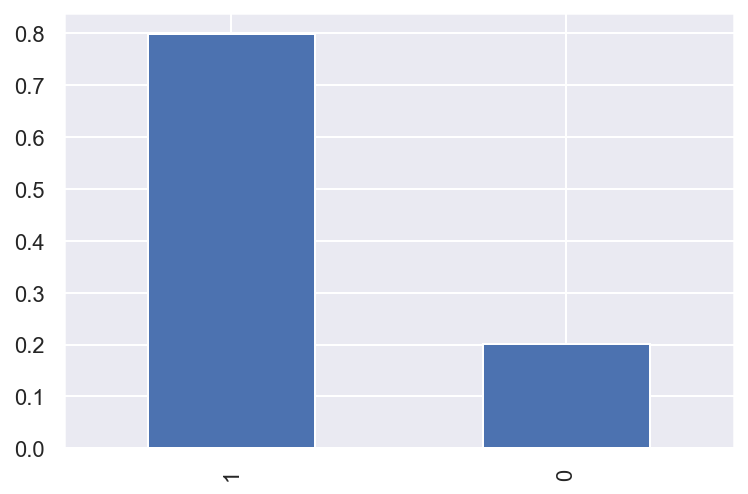

In [472]:
target_show = df_appointments['No-show'].value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

In [473]:
df_appointments['No-show'] = df_appointments['No-show'].str.replace('No', '1')
df_appointments['No-show'] = df_appointments['No-show'].str.replace('Yes', '0')
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [474]:
df_appointments['Gender'] = df_appointments['Gender'].str.replace('M', '1')
df_appointments['Gender'] = df_appointments['Gender'].str.replace('F', '0')
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [475]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


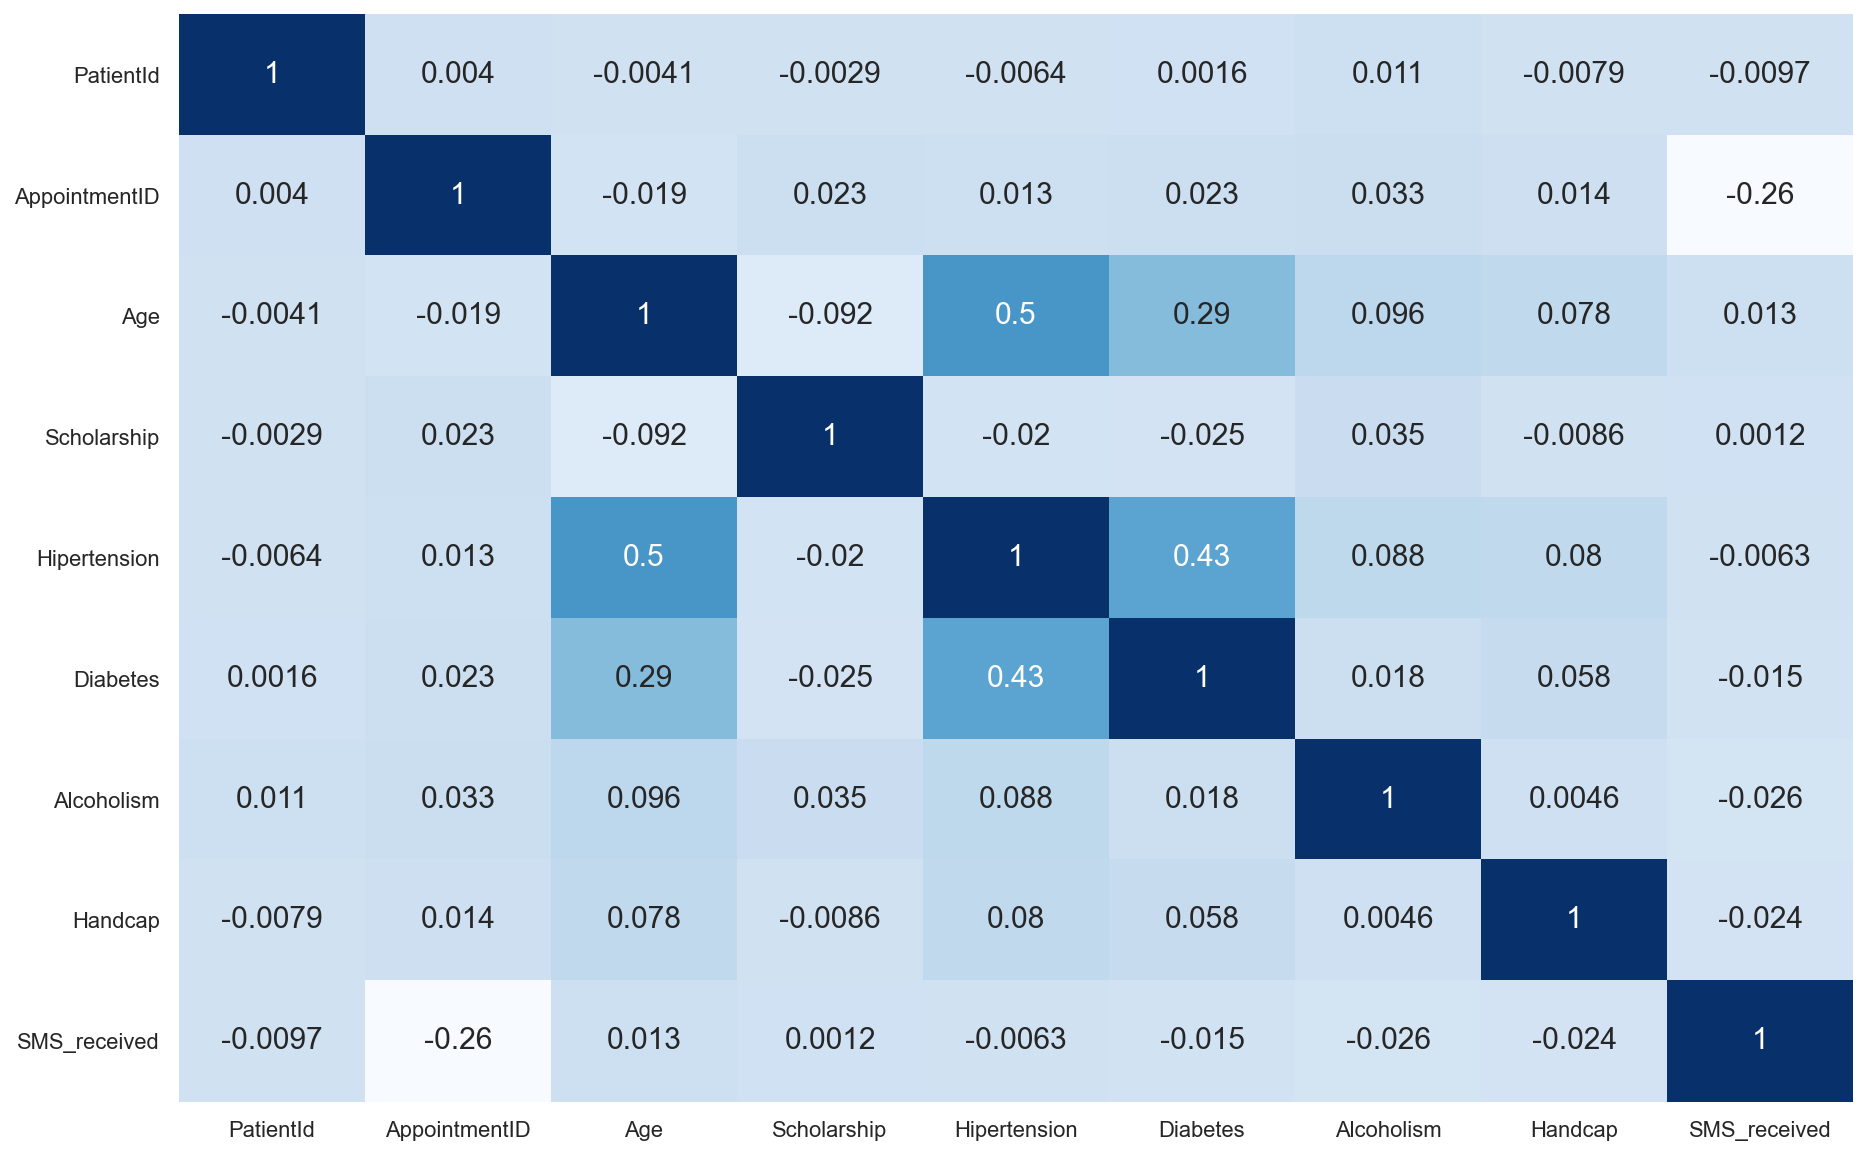

In [476]:
plt.subplots(figsize=(15,10))
dataplot = sns.heatmap(df_appointments.corr(), cbar=False, annot=True, cmap="Blues", annot_kws={"fontsize":15})

# Feature Engineering

In [477]:
df_appointments['Time_M_OR_N'] = df_appointments.loc[:].ScheduledDay.map(
  lambda x: str.split(x, "T")[1])

In [478]:
df_appointments['Time_M_OR_N']=df_appointments.loc[:].Time_M_OR_N.map(
  lambda x: str.split(x, ":")[0])
df_appointments.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_M_OR_N
110522,2.572130e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1,09
110523,3.596270e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1,07
110524,1.557660e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1,16
110525,9.213490e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1,15
110526,3.775120e+14,5629448,0,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,1,13


In [479]:
df_appointments['Time_M_OR_N']=df_appointments['Time_M_OR_N'].astype('int') 

In [480]:
df_appointments['Moring'] = (df_appointments['Time_M_OR_N']>=0) & (df_appointments['Time_M_OR_N']<=12)
#df_appointments['n'] = (df_appointments['Time_M_OR_N']>13) & (df_appointments['Time_M_OR_N']<24)
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_M_OR_N,Moring
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,False
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,False
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,False
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,False
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,False


In [481]:
df_appointments['Moring'] = df_appointments['Moring'].replace(False, 0)
df_appointments['Moring'] = df_appointments['Moring'].replace(True, 1)

df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
 14  Time_M_OR_N     110527 non-null  int64  
 15  Moring          110527 non-null  int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 13.5+ 

In [482]:
df_appointments

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_M_OR_N,Moring
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,0
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,0
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,0
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,0
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1,9,1
110523,3.596270e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1,7,1
110524,1.557660e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1,16,0
110525,9.213490e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1,15,0


In [483]:
df_appointments.shape

(110527, 16)

1    0.798067
0    0.201933
Name: No-show, dtype: float64


<AxesSubplot:>

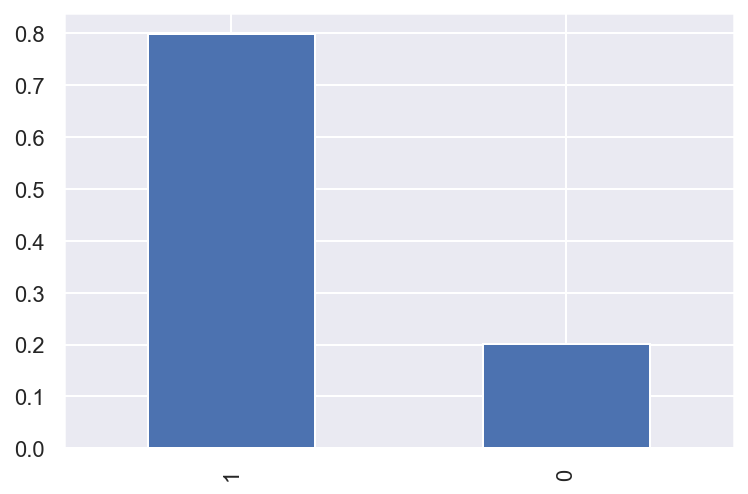

In [484]:
target_show = df_appointments['No-show'].value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

In [485]:
df_appointments.ScheduledDay=df_appointments.loc[:].ScheduledDay.map(lambda x: str.split(x, "T")[0])
df_appointments.AppointmentDay=df_appointments.loc[:].AppointmentDay.map(lambda x: str.split(x, "T")[0])

In [486]:
df_appointments['AppointmentMonth']=df_appointments.loc[:].AppointmentDay.map(lambda x: str.split(x, "-")[1]).astype('int')
df_appointments['Appointment_day']=df_appointments.loc[:].AppointmentDay.map(lambda x: str.split(x, "-")[2]).astype('int')
df_appointments['ScheduledMonth']=df_appointments.loc[:].ScheduledDay.map(lambda x: str.split(x, "-")[1]).astype('int')
df_appointments['Scheduled_day']=df_appointments.loc[:].ScheduledDay.map(lambda x: str.split(x, "-")[2]).astype('int')
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_M_OR_N,Moring,AppointmentMonth,Appointment_day,ScheduledMonth,Scheduled_day
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,0,4,29,4,29
1,5.589980e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,0,4,29,4,29
2,4.262960e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,0,4,29,4,29
3,8.679510e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,0,4,29,4,29
4,8.841190e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,0,4,29,4,29


In [488]:
df_appointments['ScheduledDay'] = pd.to_datetime(df_appointments['ScheduledDay'])
df_appointments['AppointmentDay'] = pd.to_datetime(df_appointments['AppointmentDay'])

In [489]:
from datetime import date
df_appointments['days'] = df_appointments['AppointmentDay'] - df_appointments['ScheduledDay'] 
df_appointments['days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: days, Length: 110527, dtype: timedelta64[ns]

In [490]:
df_appointments['days'] = df_appointments['AppointmentDay'] - df_appointments['ScheduledDay']
df_appointments

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,Time_M_OR_N,Moring,AppointmentMonth,Appointment_day,ScheduledMonth,Scheduled_day,days
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,1,18,0,4,29,4,29,0 days
1,5.589980e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,1,16,0,4,29,4,29,0 days
2,4.262960e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,1,16,0,4,29,4,29,0 days
3,8.679510e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,1,17,0,4,29,4,29,0 days
4,8.841190e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,1,16,0,4,29,4,29,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,...,0,1,1,9,1,6,7,5,3,35 days
110523,3.596270e+12,5650093,0,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,...,0,1,1,7,1,6,7,5,3,35 days
110524,1.557660e+13,5630692,0,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,...,0,1,1,16,0,6,7,4,27,41 days
110525,9.213490e+13,5630323,0,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,...,0,1,1,15,0,6,7,4,27,41 days


In [491]:
df_appointments = df_appointments.drop(['Neighbourhood'], axis = 1)
df_appointments = df_appointments.drop(['AppointmentDay'], axis = 1)
df_appointments = df_appointments.drop(['ScheduledDay'], axis = 1)


In [492]:
df_appointments

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_M_OR_N,Moring,AppointmentMonth,Appointment_day,ScheduledMonth,Scheduled_day,days
0,2.987250e+13,5642903,0,62,0,1,0,0,0,0,1,18,0,4,29,4,29,0 days
1,5.589980e+14,5642503,1,56,0,0,0,0,0,0,1,16,0,4,29,4,29,0 days
2,4.262960e+12,5642549,0,62,0,0,0,0,0,0,1,16,0,4,29,4,29,0 days
3,8.679510e+11,5642828,0,8,0,0,0,0,0,0,1,17,0,4,29,4,29,0 days
4,8.841190e+12,5642494,0,56,0,1,1,0,0,0,1,16,0,4,29,4,29,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,56,0,0,0,0,0,1,1,9,1,6,7,5,3,35 days
110523,3.596270e+12,5650093,0,51,0,0,0,0,0,1,1,7,1,6,7,5,3,35 days
110524,1.557660e+13,5630692,0,21,0,0,0,0,0,1,1,16,0,6,7,4,27,41 days
110525,9.213490e+13,5630323,0,38,0,0,0,0,0,1,1,15,0,6,7,4,27,41 days


In [493]:
df_appointments = df_appointments.drop(['Time_M_OR_N'], axis = 1)

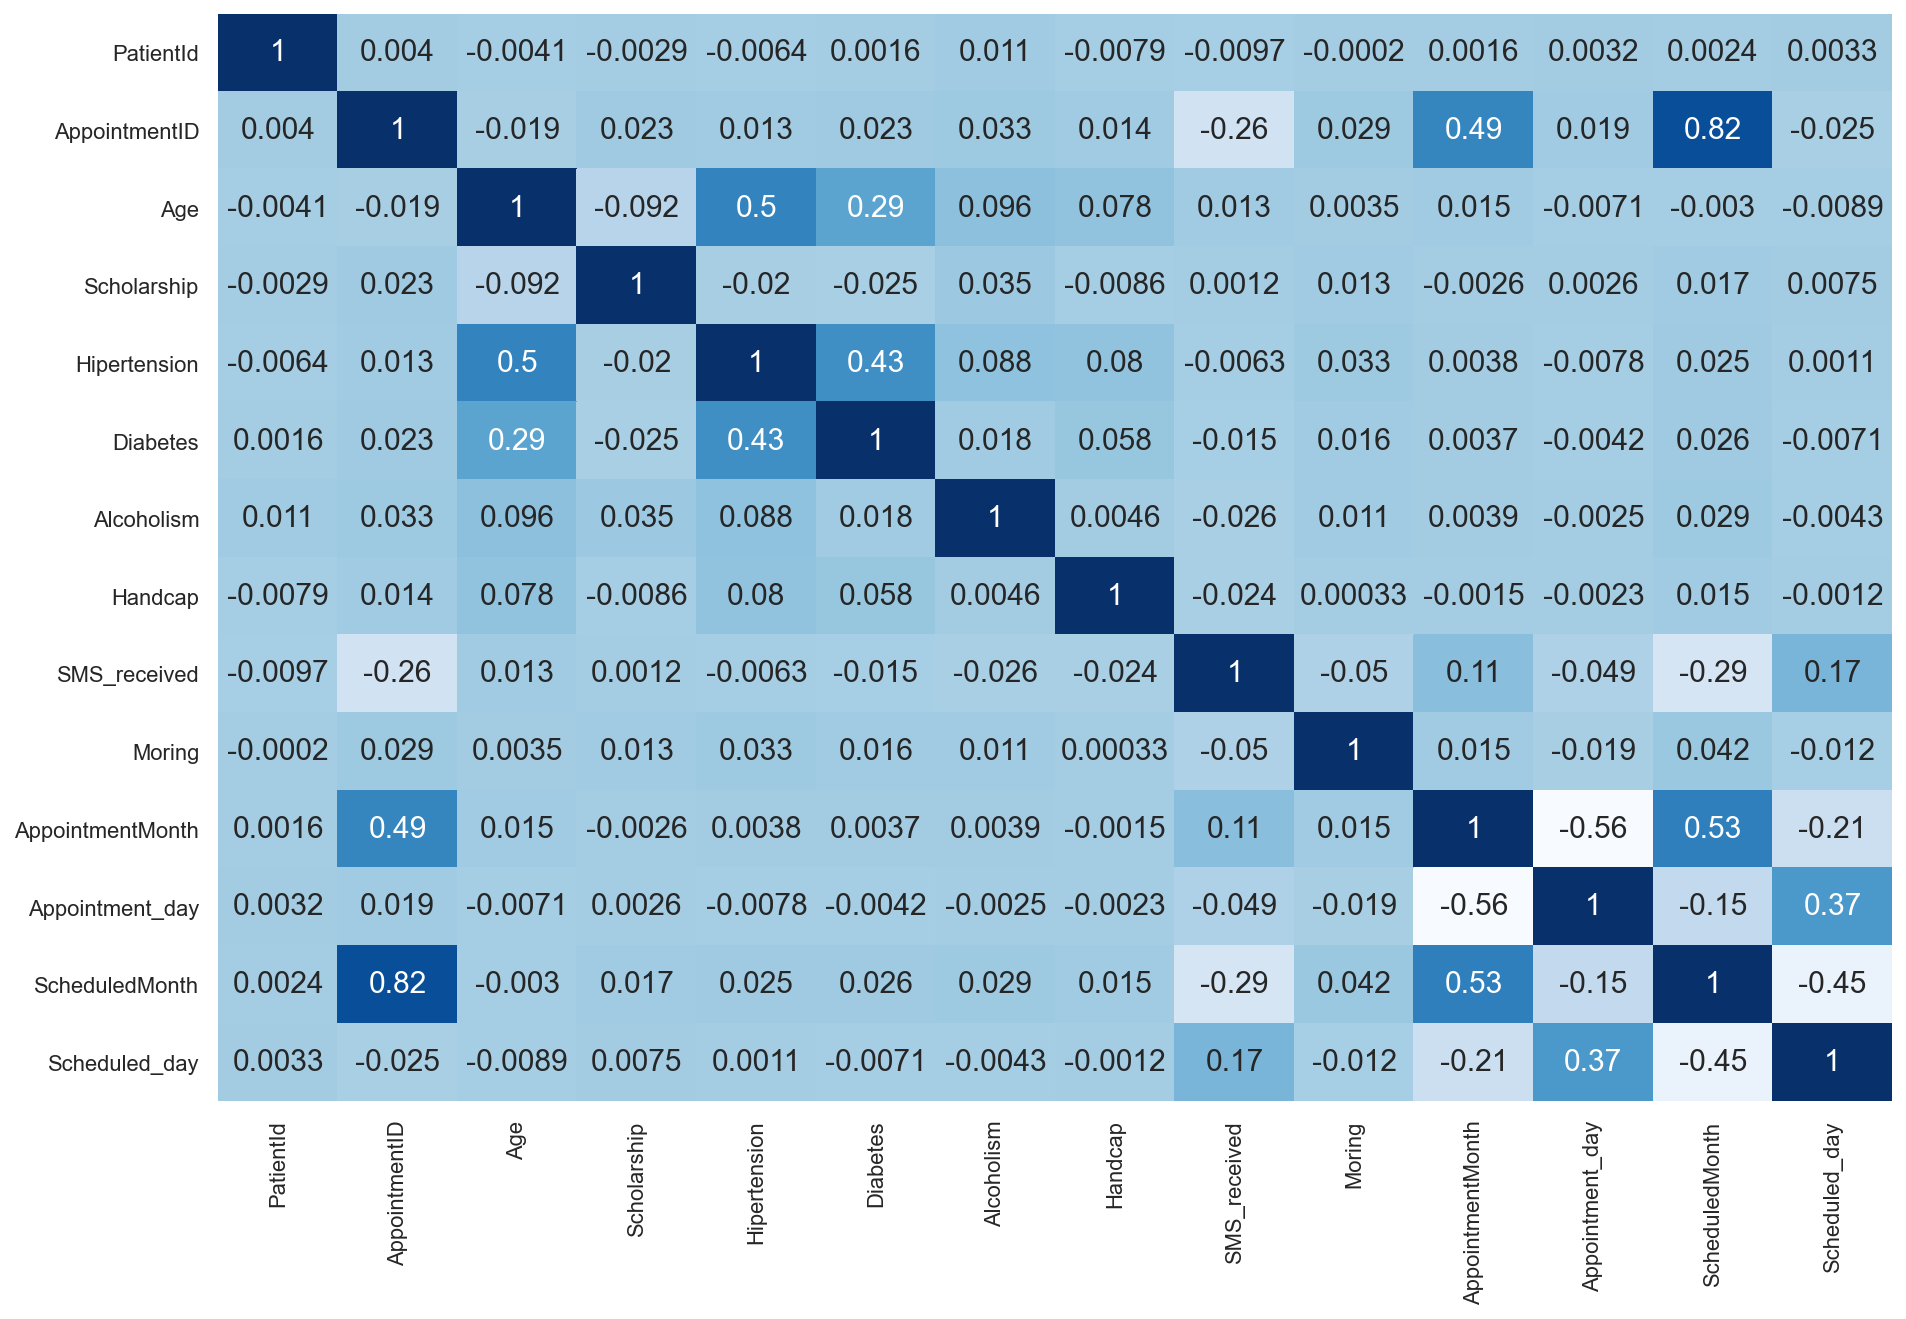

In [497]:
plt.subplots(figsize=(15,10))
dataplot = sns.heatmap(df_appointments.corr(), cbar=False, annot=True, cmap="Blues", annot_kws={"fontsize":15})

In [498]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   PatientId         110527 non-null  float64        
 1   AppointmentID     110527 non-null  int64          
 2   Gender            110527 non-null  object         
 3   Age               110527 non-null  int64          
 4   Scholarship       110527 non-null  int64          
 5   Hipertension      110527 non-null  int64          
 6   Diabetes          110527 non-null  int64          
 7   Alcoholism        110527 non-null  int64          
 8   Handcap           110527 non-null  int64          
 9   SMS_received      110527 non-null  int64          
 10  No-show           110527 non-null  object         
 11  Moring            110527 non-null  int64          
 12  AppointmentMonth  110527 non-null  int64          
 13  Appointment_day   110527 non-null  int64    

In [499]:
df_appointments['Gender']=df_appointments['Gender'].astype('int') 
df_appointments['No-show']= df_appointments['No-show'].astype('int') 

In [500]:
X = df_appointments.drop(['Scholarship','SMS_received','days','No-show'], axis = 1)
y = df_appointments['No-show']
#y =pd.DataFrame(y)

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.05, random_state=42)
# validatipon =0.05 test =0.05 train= 0.90

In [502]:
# convert delta date to int
df_appointments['days'] = (df_appointments.days / np.timedelta64(1,'D')).astype(int)

In [503]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110527 non-null  float64
 1   AppointmentID     110527 non-null  int64  
 2   Gender            110527 non-null  int64  
 3   Age               110527 non-null  int64  
 4   Scholarship       110527 non-null  int64  
 5   Hipertension      110527 non-null  int64  
 6   Diabetes          110527 non-null  int64  
 7   Alcoholism        110527 non-null  int64  
 8   Handcap           110527 non-null  int64  
 9   SMS_received      110527 non-null  int64  
 10  No-show           110527 non-null  int64  
 11  Moring            110527 non-null  int64  
 12  AppointmentMonth  110527 non-null  int64  
 13  Appointment_day   110527 non-null  int64  
 14  ScheduledMonth    110527 non-null  int64  
 15  Scheduled_day     110527 non-null  int64  
 16  days              11

In [504]:
X_train

,PatientId,AppointmentID,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,Moring,AppointmentMonth,Appointment_day,ScheduledMonth,Scheduled_day
66642,5.118670e+13,5674426,0,45,0,0,0,0,1,5,9,5,9
36721,8.255470e+14,5752922,1,1,0,0,0,0,0,5,31,5,31
48687,4.471120e+13,5634361,0,50,0,0,0,0,1,5,20,4,28
8236,7.115870e+14,5727078,0,40,0,0,0,0,0,5,20,5,20
28312,6.293551e+09,5621434,0,0,0,0,0,0,1,5,16,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,4.876250e+11,5664593,0,63,1,1,0,0,1,5,10,5,5
110268,3.911650e+12,5622779,1,31,0,0,0,0,0,6,1,4,26
103694,4.973440e+11,5762864,0,38,0,0,0,0,1,6,8,6,2
860,2.623490e+14,5639951,0,18,0,0,0,0,1,4,29,4,29


In [505]:
y_train

66642     1
36721     1
48687     1
8236      1
28312     0
         ..
76820     1
110268    1
103694    1
860       1
15795     1
Name: No-show, Length: 105000, dtype: int64

In [506]:
lm0 = LogisticRegression() 
lm0.fit(X_train, y_train)

LogisticRegression()

In [507]:
lm0.score(X_train, y_train)

0.7981238095238096

In [508]:
lm0.score(X_test, y_test)

0.7969965623303782

In [322]:
#df_appointments=df_appointments.drop(['PatientId','AppointmentID'], axis = 1)

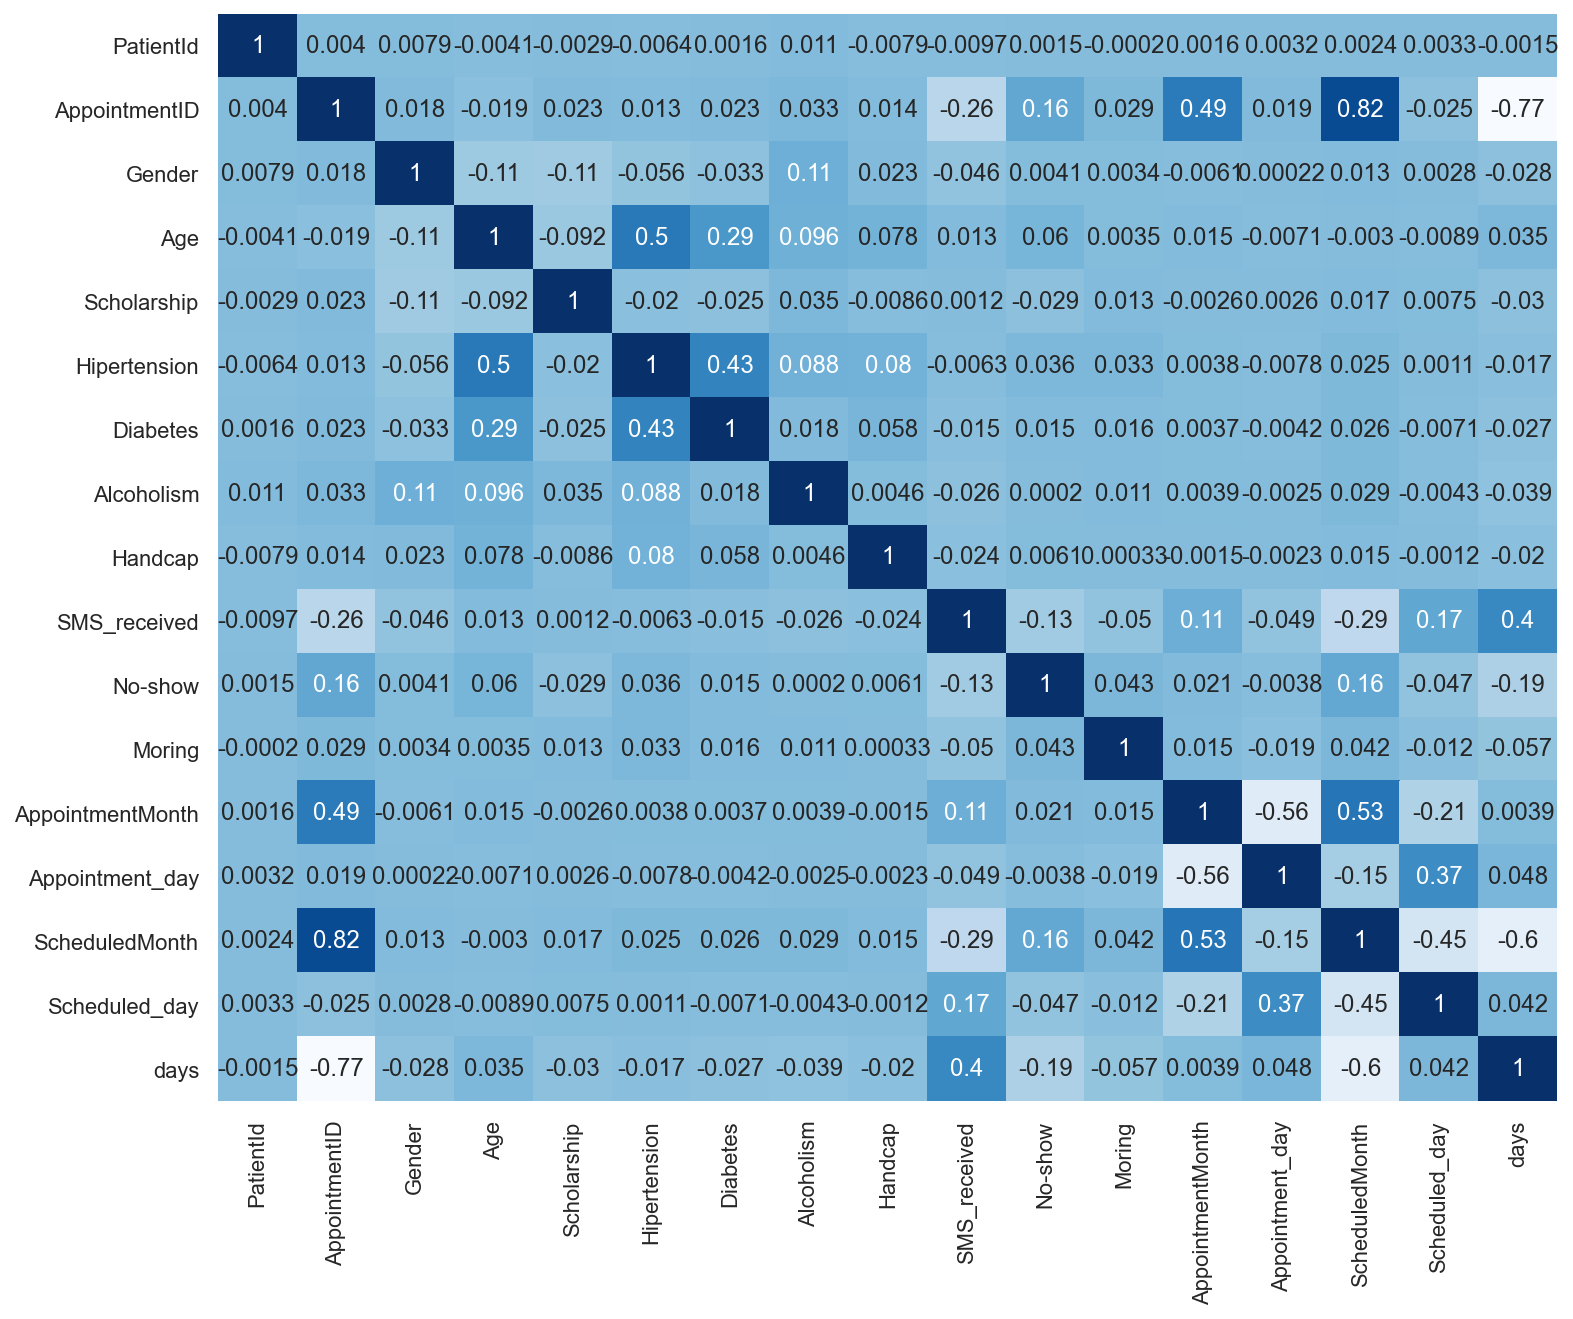

In [512]:
plt.subplots(figsize=(12,10))
dataplot = sns.heatmap(df_appointments.corr(), cbar=False, annot=True, cmap="Blues", annot_kws={"fontsize":12})

# Split the data

In [323]:
X

,PatientId,AppointmentID,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,Moring
0,2.987250e+13,5642903,0,62,1,0,0,0,0
1,5.589980e+14,5642503,1,56,0,0,0,0,0
2,4.262960e+12,5642549,0,62,0,0,0,0,0
3,8.679510e+11,5642828,0,8,0,0,0,0,0
4,8.841190e+12,5642494,0,56,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,56,0,0,0,0,1
110523,3.596270e+12,5650093,0,51,0,0,0,0,1
110524,1.557660e+13,5630692,0,21,0,0,0,0,0
110525,9.213490e+13,5630323,0,38,0,0,0,0,0


In [324]:
X = df_appointments.drop(['No-show'], axis = 1)
y = df_appointments['No-show']
#y =pd.DataFrame(y)
y

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No-show, Length: 110527, dtype: int64

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.05, random_state=42)
# validatipon =0.05 test =0.05 train= 0.90

In [326]:
X_train

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Moring,days
66642,5.118670e+13,5674426,0,45,0,0,0,0,0,0,1,0
36721,8.255470e+14,5752922,1,1,0,0,0,0,0,0,0,0
48687,4.471120e+13,5634361,0,50,0,0,0,0,0,0,1,22
8236,7.115870e+14,5727078,0,40,0,0,0,0,0,0,0,0
28312,6.293551e+09,5621434,0,0,0,0,0,0,0,0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
76820,4.876250e+11,5664593,0,63,0,1,1,0,0,1,1,5
110268,3.911650e+12,5622779,1,31,0,0,0,0,0,0,0,36
103694,4.973440e+11,5762864,0,38,0,0,0,0,0,0,1,6
860,2.623490e+14,5639951,0,18,1,0,0,0,0,0,1,0


# Baseline before Over Sampling

In [327]:
lm1 = LogisticRegression() 
lm1.fit(X_train, y_train)

LogisticRegression()

In [328]:
lm1.score(X_train, y_train)

0.7981238095238096

In [329]:
lm1.score(X_test, y_test)

0.7969965623303782

# Polynomial 

In [330]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(degree=2)
#X_train_poly = poly.fit_transform(X_train)
#X_test_poly= poly.transform(X_test)
#X_val_poly= poly.transform(X_val)
#poly.fit(X_train_poly, y_train)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)
Plr = LogisticRegression()
Plr.fit(X_train_poly, y_train)

/Users/User/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [331]:
Plr.score(X_train_poly, y_train)

0.2018761904761905

In [332]:
Plr.score(X_test_poly, y_test)

0.20300343766962187

# Handling The Class Imbalance Struggle (With Instacart Data)

In [64]:
#PART 1
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({1: 83803, 0: 21197})
After oversampling:  Counter({1: 83803, 0: 83803})


0    0.5
1    0.5
Name: No-show, dtype: float64


<AxesSubplot:>

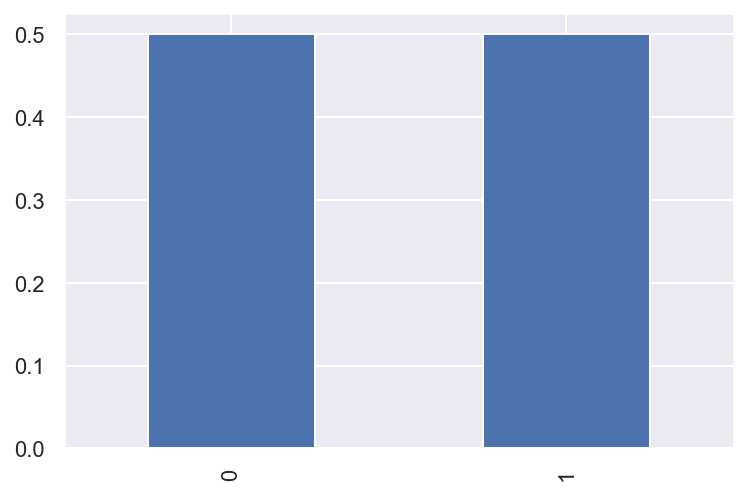

In [65]:
# ترسم التارقت واشوف بالانس او لا 
target_show = y_train_SMOTE.value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

# Baseline after Over Sambling

In [66]:
lm2 = LogisticRegression() 
lm2.fit(X_train, y_train)

LogisticRegression()

In [67]:
lm2.score(X_train_SMOTE, y_train_SMOTE)

0.5

In [68]:
lm2.score(X_test, y_test)

0.7969965623303782

# Instantiate four models

In [127]:
from sklearn import linear_model, neighbors, ensemble
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

from mlxtend.classifier import StackingClassifier

ModuleNotFoundError: No module named 'mlxtend'

In [128]:
lr_model = linear_model.LogisticRegression(solver="lbfgs", random_state=1)
knn_model = neighbors.KNeighborsClassifier()
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)#  100 مية شجرة 
et_model = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1) # ExtraTreesClassifier يستعمل كل الراندوم 

models = ["lr_model", "knn_model", "rf_model", "et_model"]

In [129]:
for model_name in models:
    
    curr_model = eval(model_name) # تاخذ المودل وتحوله لاوبجكت 
    
    curr_model.fit(X_train, y_train)
    
   # with open(f"models/{model_name}.pickle", "wb") as pfile:
        #pickle.dump(curr_model, pfile)

In [130]:
# Load pre-trained/tuned models

model_names = ["lr_model", "knn_model", "rf_model", "et_model"]

"""
for model_name in model_names:
    with open(f"models/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")
        
"""

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [131]:
model_list

[('lr_model', LogisticRegression(random_state=1)),
 ('knn_model', KNeighborsClassifier()),
 ('rf_model', RandomForestClassifier(random_state=1)),
 ('et_model', ExtraTreesClassifier(random_state=1))]

In [134]:
# Quick peek at each model performance

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_model score: 0.7969965623303782
knn_model score: 0.7680477655147457
rf_model score: 0.7924733128279355
et_model score: 0.7836077438031481


# Max Voting (hard)

In [75]:
# create voting classifier  voting_classifer = يطلع الماجورتي ويقرر الواي هات اذا صفر او واحد ويقارنها بالواي تست
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1) # شغل كل الاتريبيوت
voting_classifer.fit(X_train, y_train)


VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('knn_model', KNeighborsClassifier()),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=1))],
                 n_jobs=-1)

In [76]:
# get accuracy (model to beat: RF with 0.7992852619198407 accuracy)
from sklearn.metrics import accuracy_score

y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.7942826126289126

# Average Voting (soft)

In [83]:
# create voting classifier
weights = [1.5,3.8,4.2,2.2]
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('knn_model', KNeighborsClassifier()),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=1))],
                 n_jobs=-1, voting='soft', weights=[1.5, 3.8, 4.2, 2.2])

In [84]:
# Get accuracy (model to beat: RF with 0.7976567447751741 accuracy)
y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8015198118328207

# Weighted Voting

In [85]:
weights = [2.5,1200,1200,8]
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('knn_model', KNeighborsClassifier()),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=1))],
                 n_jobs=-1, voting='soft', weights=[2.5, 1200, 1200, 8])

In [333]:
y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: name 'voting_model' is not defined